In [1]:
#Import required packages
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
import sklearn.metrics
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\sreekanth\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
loan=pd.read_csv("LoanStat.csv", low_memory=False) #load the csv file 

In [3]:
loan= loan.drop(['desc'],axis=1) #drop the 'desc' column

In [4]:
loan.shape #Identify number of rows and columns in table

(42538, 144)

In [5]:
#Remove the columns which are having null values more than 30% of total no. of rows
for i in loan.columns:
    nullfraction=loan[i].isnull().sum()/len(loan)
    if nullfraction>=0.3:
        loan.drop(i,axis=1,inplace=True)

In [6]:
loan.shape

(42538, 53)

In [7]:
#Print the columns having null values
for i in loan.columns:
    if loan[i].isnull().sum()>0:
        print("%s    :    %s    :    %s" %(i,loan[i].isnull().sum(),loan[i].dtypes))

loan_amnt    :    3    :    float64
funded_amnt    :    3    :    float64
funded_amnt_inv    :    3    :    float64
term    :    3    :    object
int_rate    :    3    :    object
installment    :    3    :    float64
grade    :    3    :    object
sub_grade    :    3    :    object
emp_title    :    2629    :    object
emp_length    :    1115    :    object
home_ownership    :    3    :    object
annual_inc    :    7    :    float64
verification_status    :    3    :    object
issue_d    :    3    :    object
loan_status    :    3    :    object
pymnt_plan    :    3    :    object
purpose    :    3    :    object
title    :    16    :    object
zip_code    :    3    :    object
addr_state    :    3    :    object
dti    :    3    :    float64
delinq_2yrs    :    32    :    float64
earliest_cr_line    :    32    :    object
inq_last_6mths    :    32    :    float64
open_acc    :    32    :    float64
pub_rec    :    32    :    float64
revol_bal    :    3    :    float64
revol_util    :

In [8]:
loan=loan.drop_duplicates(subset=list(loan),keep=False)#Drop the duplicate rows

In [9]:
#Drop the columns which are having only one value for all rows
orig_columns = loan.columns
drop_columns = []
for col in orig_columns:
    col_series = loan[col].dropna().unique()
    if len(col_series) == 1:
        drop_columns.append(col)
loan.drop(drop_columns, axis = 1,inplace=True)
drop_columns

['pymnt_plan',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'chargeoff_within_12_mths',
 'hardship_flag',
 'disbursement_method']

In [10]:
#Print the rows which are having more than 40 null values
for i in range(len(loan)):
    if loan.iloc[i,:].isnull().sum()>=40:
        print("%s : %s"%(i,loan.iloc[i,:].isnull().sum()))

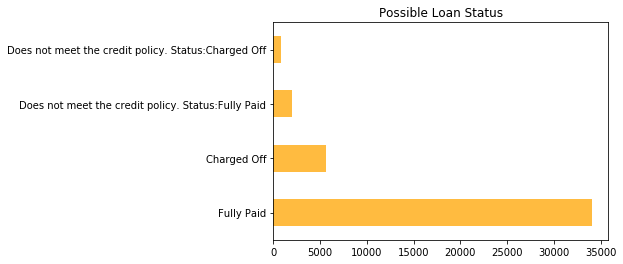

In [11]:
#Horizontal bar chart for 'loan_status'
loan['loan_status'].value_counts().plot(kind= 'barh', color = 'orange', title = 'Possible Loan Status', alpha = 0.75)

In [12]:
    #New dataset with data of 'loan_status' in 'Fully Paid' or 'Charged Off'
data_loan = loan[(loan['loan_status'] == "Fully Paid") | (loan['loan_status'] == "Charged Off")]

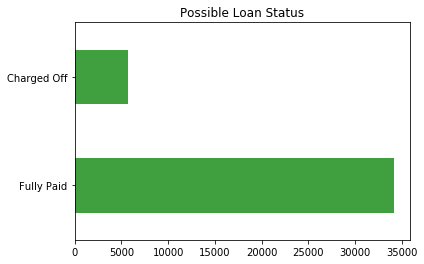

In [13]:
data_loan['loan_status'].value_counts().plot(kind= 'barh', color = 'green', title = 'Possible Loan Status', alpha = 0.75)

In [17]:
#Prepare Keep_list with required columns
keep_list = ['addr_state', 'annual_inc','last_credit_pull_d', 'dti', 'earliest_cr_line',
             'emp_length', 'emp_title','grade', 'home_ownership', 'installment', 
             'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'open_acc','pub_rec','pub_rec_bankruptcies',
             'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 
             'verification_status']

In [18]:
#New dataset with keep_list columns
data_req = data_loan[keep_list]

In [19]:
#Keep_list with two columns removed 'application_type'  and 'initial_list_status'
keep_list_final = ['addr_state', 'annual_inc','last_credit_pull_d', 'dti', 'earliest_cr_line',
             'emp_length', 'emp_title','grade', 'home_ownership', 'installment', 
             'int_rate', 'issue_d', 'loan_amnt', 'loan_status', 'open_acc','pub_rec','pub_rec_bankruptcies',
             'purpose', 'revol_bal', 'revol_util', 'sub_grade', 'term', 'title', 'total_acc', 
             'verification_status']

In [20]:
#New dataset with keep_list_final columns
data_req = data_loan[keep_list_final]

In [21]:
#Identify null values in each column
data_req.isnull().sum()

addr_state                 0
annual_inc                 0
last_credit_pull_d         2
dti                        0
earliest_cr_line           0
emp_length              1078
emp_title               2467
grade                      0
home_ownership             0
installment                0
int_rate                   0
issue_d                    0
loan_amnt                  0
loan_status                0
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies     697
purpose                    0
revol_bal                  0
revol_util                50
sub_grade                  0
term                       0
title                     11
total_acc                  0
verification_status        0
dtype: int64

In [22]:
#Print columns having null values
for i in data_req.columns:
    if data_req[i].isnull().sum()>0:
        print(i,":",data_req[i].isnull().sum()>0,":",data_req[i].dtypes)

last_credit_pull_d : True : object
emp_length : True : object
emp_title : True : object
pub_rec_bankruptcies : True : float64
revol_util : True : object
title : True : object


In [23]:
#Value count of column 'pub_rec_bankruptcies'
data_req['pub_rec_bankruptcies'].value_counts()

0.0    37404
1.0     1678
2.0        7
Name: pub_rec_bankruptcies, dtype: int64

In [24]:
#Remove the rows with null values in 'pub_rec_bankruptcies'
data_req1 = data_req[data_req.pub_rec_bankruptcies.notnull()]

In [25]:
data_req1.shape

(39089, 25)

In [26]:
#Drop columns not requied
data_final = data_req1.drop(["last_credit_pull_d", "earliest_cr_line", "addr_state", "title"], axis=1)
#Remove % symbol and change columns to float data type
data_final["int_rate"] = data_final["int_rate"].str.rstrip("%").astype("float")
data_final["revol_util"] = data_final["revol_util"].str.rstrip("%").astype("float")

In [27]:
data_final.shape

(39089, 21)

In [28]:
#Impute null values in numerical columns with mean values
data_final.fillna(data_final.mean(),inplace=True)

In [29]:
#Drop emp_title column 
data_final = data_final.drop("emp_title", axis=1)

In [30]:
#Divide columns in to two lists categorical and numerical
numcol=[]
catcol=[]
for i in data_final.columns:
    if data_final[i].dtypes=='object':
        catcol.append(i)
    else:
        numcol.append(i)

In [31]:
numcol

['annual_inc',
 'dti',
 'installment',
 'int_rate',
 'loan_amnt',
 'open_acc',
 'pub_rec',
 'pub_rec_bankruptcies',
 'revol_bal',
 'revol_util',
 'total_acc']

In [32]:
#Remove 'pub_rec_bankruptcies' and 'pub_rec' columns from numcol list as they cannot be considered numerical
numcol.remove('pub_rec_bankruptcies')
numcol.remove('pub_rec')               

In [33]:
numcol

['annual_inc',
 'dti',
 'installment',
 'int_rate',
 'loan_amnt',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc']

In [34]:
#Scale the numerical columns using minimax scaler and form a new dataset with numerical columns
scaler=MinMaxScaler()
numcol_scaled= pd.DataFrame(scaler.fit_transform(data_final[numcol]), columns=numcol)

In [35]:
catcol

['emp_length',
 'grade',
 'home_ownership',
 'issue_d',
 'loan_status',
 'purpose',
 'sub_grade',
 'term',
 'verification_status']

In [36]:
#Remove loan_status from cat_col as it is response variable
catcol.remove('loan_status')

In [37]:
#Identify columns having null values
for i in data_final.columns:
    if data_final[i].isnull().sum()>0:
        print(i,":",data_final[i].isnull().sum(),":",data_final[i].dtypes)

emp_length : 1078 : object


In [38]:
#Impute null values in categorical columns with 'others'
data_final.fillna('Others',inplace=True)

In [39]:
# Convert categorical columns to binaries using dummy columns and save it as new dataset
dummy_df = pd.get_dummies(data_final[catcol])

In [40]:
#Dummies for the two columns 'pub_rec' and 'pub_rec_bankruptcies'
col=['pub_rec','pub_rec_bankruptcies']
dummy_df1 = pd.get_dummies(data_final[col])

In [41]:
#Convert 'loan_status' column into binaries
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}
data_final = data_final.replace(status_replace)

In [42]:
# Prepare a cleaned loan dataset by concatenating numerical data and categorical data

col_names=numcol+list(dummy_df)+list(dummy_df1)
loandata_cleaned= pd.DataFrame(np.hstack([numcol_scaled,dummy_df,dummy_df1]),columns=col_names)

In [43]:
loandata_cleaned

,annual_inc,dti,installment,int_rate,loan_amnt,open_acc,revol_bal,revol_util,total_acc,emp_length_1 year,...,sub_grade_G3,sub_grade_G4,sub_grade_G5,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pub_rec,pub_rec_bankruptcies
0,0.003336,0.921974,0.113869,0.272822,0.130435,0.023810,0.091237,0.837838,0.079545,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.004336,0.033344,0.033938,0.513824,0.057971,0.023810,0.011278,0.094094,0.022727,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.001376,0.290764,0.052944,0.549817,0.055072,0.000000,0.019761,0.985986,0.090909,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.007538,0.666889,0.250739,0.420970,0.275362,0.190476,0.037423,0.210210,0.397727,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.012675,0.598199,0.040113,0.379238,0.072464,0.309524,0.185730,0.539540,0.409091,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,0.005337,0.373458,0.108897,0.129369,0.130435,0.166667,0.053233,0.283283,0.113636,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
6,0.007172,0.783928,0.119462,0.549817,0.188406,0.119048,0.118499,0.856857,0.102273,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7,0.007338,0.178393,0.072414,0.689619,0.072464,0.047619,0.054958,0.875876,0.022727,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.006004,0.185062,0.105740,0.827334,0.147826,0.214286,0.034829,0.326326,0.125000,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
9,0.001835,0.602868,0.081739,0.379238,0.141304,0.000000,0.062030,0.365365,0.011364,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [46]:
# Using sklearn
mat= loandata_cleaned.values
km = KMeans(n_clusters=2)
km.fit(mat)
# Get cluster assignment labels
labels = km.labels_


In [47]:
labels

array([1, 0, 1, ..., 1, 1, 1])

In [48]:
data_labels=pd.DataFrame(labels)

In [49]:
data_labels.columns=['labels']

In [50]:
data_model=pd.concat((loandata_cleaned,data_labels),axis=1)

In [51]:
data_model

,annual_inc,dti,installment,int_rate,loan_amnt,open_acc,revol_bal,revol_util,total_acc,emp_length_1 year,...,sub_grade_G4,sub_grade_G5,term_ 36 months,term_ 60 months,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,pub_rec,pub_rec_bankruptcies,labels
0,0.003336,0.921974,0.113869,0.272822,0.130435,0.023810,0.091237,0.837838,0.079545,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1
1,0.004336,0.033344,0.033938,0.513824,0.057971,0.023810,0.011278,0.094094,0.022727,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
2,0.001376,0.290764,0.052944,0.549817,0.055072,0.000000,0.019761,0.985986,0.090909,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1
3,0.007538,0.666889,0.250739,0.420970,0.275362,0.190476,0.037423,0.210210,0.397727,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
4,0.012675,0.598199,0.040113,0.379238,0.072464,0.309524,0.185730,0.539540,0.409091,1.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
5,0.005337,0.373458,0.108897,0.129369,0.130435,0.166667,0.053233,0.283283,0.113636,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
6,0.007172,0.783928,0.119462,0.549817,0.188406,0.119048,0.118499,0.856857,0.102273,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0
7,0.007338,0.178393,0.072414,0.689619,0.072464,0.047619,0.054958,0.875876,0.022727,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1
8,0.006004,0.185062,0.105740,0.827334,0.147826,0.214286,0.034829,0.326326,0.125000,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0
9,0.001835,0.602868,0.081739,0.379238,0.141304,0.000000,0.062030,0.365365,0.011364,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0


In [52]:
#Perform PCA to have two principal components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(loandata_cleaned.values)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

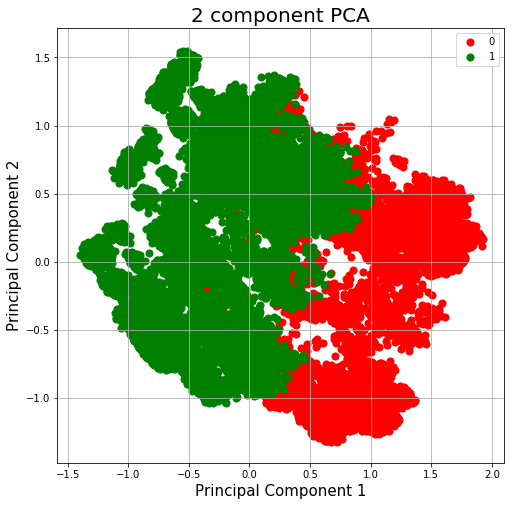

In [53]:
# Plot the data to view clusters
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = [0,1]
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = labels == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1']
               , principalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()